## Introduction

- Exam scores can be predicted based on study time using regression models, such as linear regression

### Steps

This steps we will follow:- 

- Collect the data on study time and exam score
- Preprocess the data
- Split the data into training and test sets
- Train the mode on the training set
- Use the model to make prediction on the testing set
- Evaluate the model's Performance using metric like Mean Square Error(MSE) or R-Squared

## Import Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics

## Load the Dataset

In [52]:
df = pd.read_csv('./Data/student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


## Explore The Dataset

In [54]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [55]:
df.shape

(25, 2)

In [56]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Data Analysis

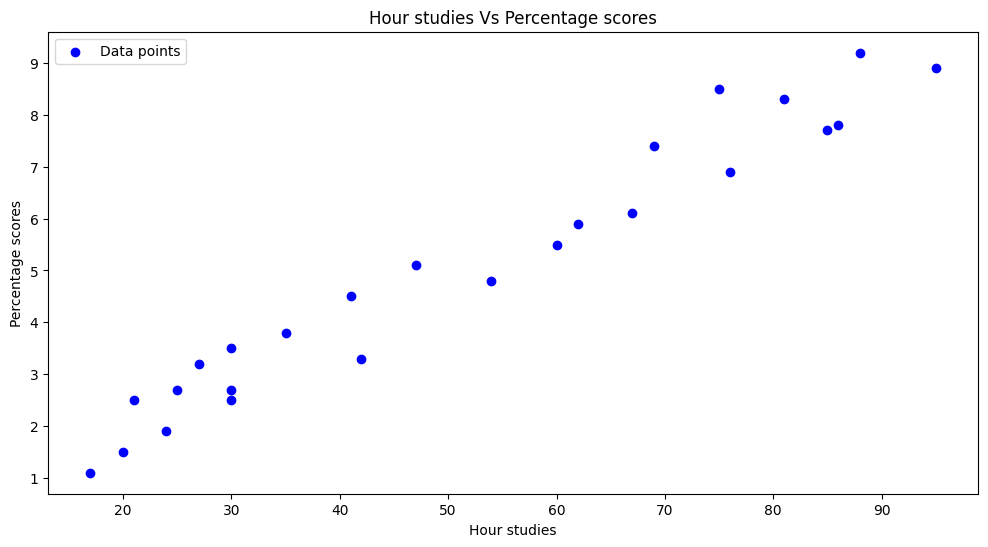

In [57]:
# Create a scatter plot

plt.figure(figsize=(12, 6))
plt.scatter(df['Scores'], df['Hours'], c = 'blue', marker='o', label = 'Data points')

plt.title('Hour studies Vs Percentage scores')
plt.xlabel('Hour studies')
plt.ylabel('Percentage scores')
plt.legend()

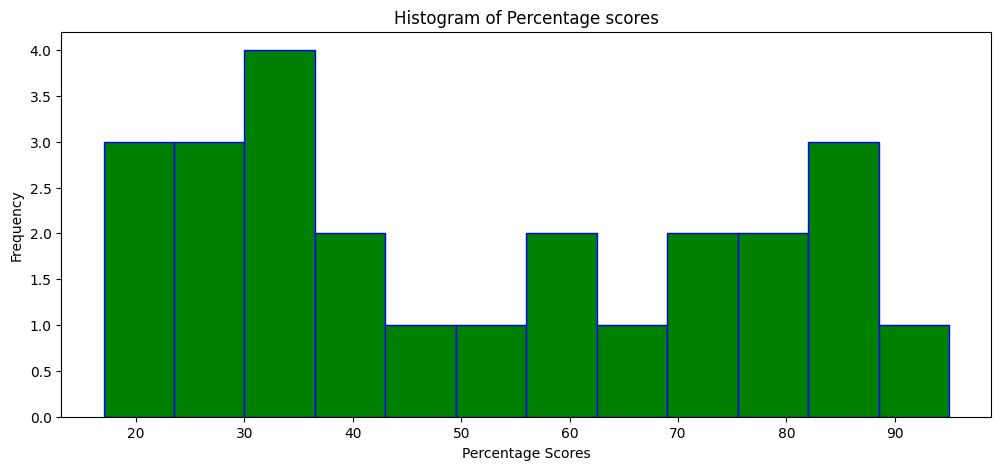

In [58]:
# Create a histogram of Percentage scores

plt.figure(figsize=(12,5))
plt.hist(df['Scores'], bins= 12, color='green', edgecolor= 'blue')
plt.title("Histogram of Percentage scores")

plt.xlabel('Percentage Scores')
plt.ylabel('Frequency')

plt.show()

Text(0.5, 0, 'Percentage Scores')

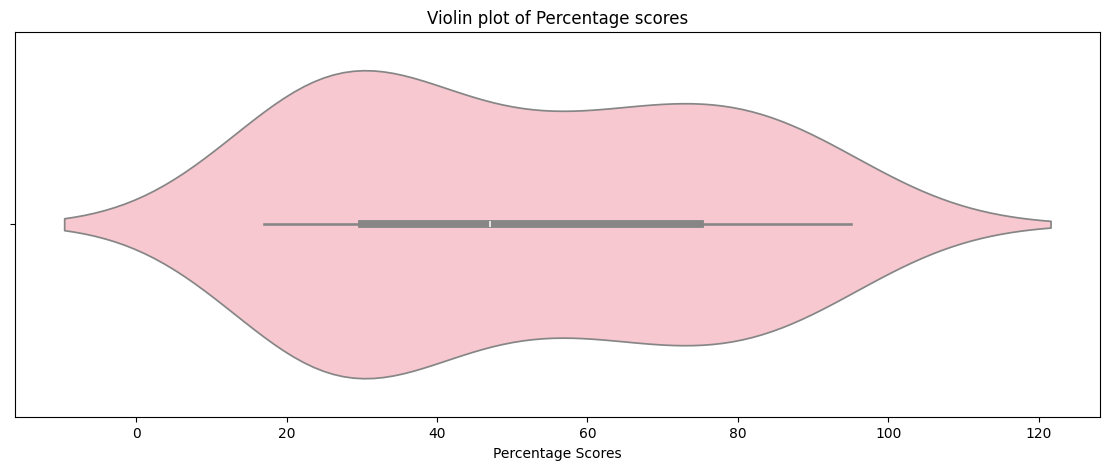

In [59]:
# Create a violin plot of Percentage scores

plt.figure(figsize=(14,5))
sns.violinplot(x = 'Scores', data = df, color = 'pink' )

plt.title('Violin plot of Percentage scores')
plt.xlabel('Percentage Scores')

## Model Training

In [60]:
X = df.iloc[:, :-1].values
y = df.iloc[:,1].values


In [61]:
x_train,x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

## Model Selection

In [62]:
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

Text(0, 0.5, 'Y-axis Label')

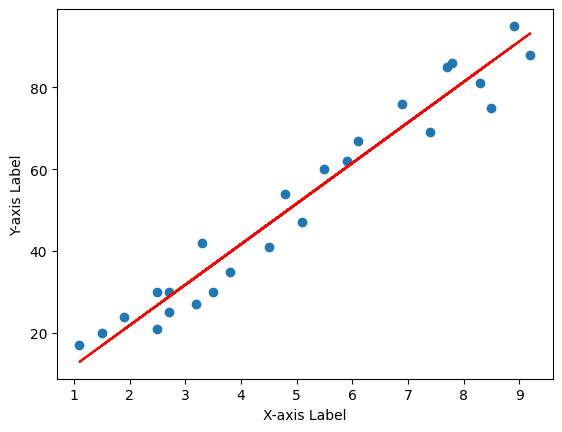

In [63]:
plt.scatter(X, y, label = 'Data point')

plt.plot(X, linear.predict(X), color ='red', label = 'Regression Line')

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

## Making Prediction

In [64]:
y_pred = linear.predict(x_test)

df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [65]:
hours = 9.25

predicted = linear.predict([[hours]])

print("Predicted scores = ", predicted[0])

Predicted scores =  93.69173248737535


## Evaluating the model

In [66]:
print('Mean absolute metrics: ', metrics.mean_absolute_error(y_test, y_pred))

print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('R-squared: ', metrics.r2_score(y_test, y_pred))



Mean absolute metrics:  4.183859899002975
RMSE:  4.647447612100367
R-squared:  0.9454906892105355
